## OpenEarhMap demo
### SparseMask ligthweight model 

In [1]:
import torch
from thop import profile

from config import config
from evaluation_tools.evaluator import SegEvaluator
from evaluation_tools.utils import prepare_data
from oem_lightweight import sparsemask

### Pre-trained model
Download the network mask and pre-trained weights from https ... and place them in "models/SparseMask/"

In [2]:
# load SparseMask model
model = sparsemask(mask="mask_thres_0.001.npy", weights="checkpoint_63750.pth.tar")

# check number of parameters and flops
flop, params = profile(model["model"], inputs=(torch.randn(1, 3, 1024, 1024),), verbose=False)
print("Params = %fMB, FLOP = %fGB" % (params / 1e6, flop / 1e9))

Params = 2.958152MB, FLOP = 10.445718GB


### Demo 1

In [3]:
# get data files: image and label files
image = "demo_data/images/houston_16.tif"
label = "demo_data/labels/houston_16.tif"

# prepare the data
data = prepare_data(img_file=image, label_file=label)

In [4]:
# init evaluator
evaluator = SegEvaluator(config, data=data, network=model)

# preform evaluation
result = evaluator.evaluate()
print(result)

[[3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 ...
 [1 2 2 ... 2 2 2]
 [1 1 7 ... 2 2 2]
 [1 1 7 ... 2 2 2]]


In [5]:
# commute IoU
evaluator.compute_metric(result)

Class IoU Results
------------------------------
1 Bareland      	nan%
2 Rangeland     	52.25%
3 Developed space	47.69%
4 Road          	60.60%
5 Tree          	61.81%
6 Water         	91.25%
7 Agriculture land	nan%
8 Buildings     	71.23%
------------------------------
mean_IoU        	64.14%


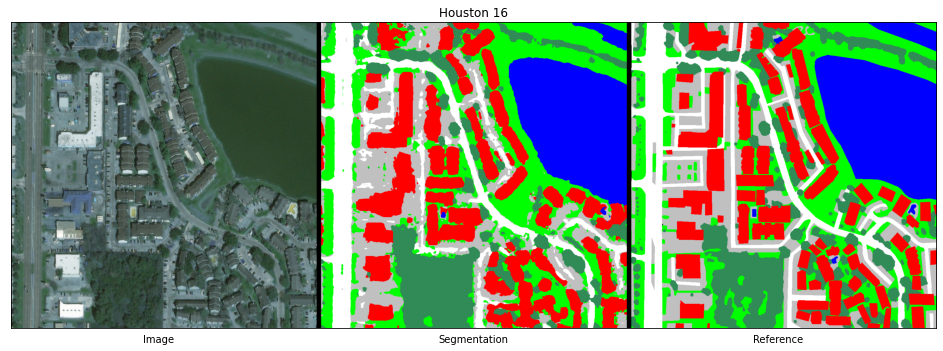

In [6]:
# plot and save image
evaluator.show_predicted_image(result, only_pred=False, save_img=False, save_dir=None)

### Demo 2

In [7]:
# get demo data files: image and label files
image = "demo_data/images/palu_8.tif"
label = "demo_data/labels/palu_8.tif"

# prepare the data
data = prepare_data(img_file=image, label_file=label)

In [8]:
# init evaluator
evaluator = SegEvaluator(config, data=data, network=model)

# preform evaluation
result = evaluator.evaluate()
print(result)

[[4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 4]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]]


In [9]:
# commute IoU
evaluator.compute_metric(result)

Class IoU Results
------------------------------
1 Bareland      	nan%
2 Rangeland     	51.88%
3 Developed space	67.31%
4 Road          	36.85%
5 Tree          	68.58%
6 Water         	84.81%
7 Agriculture land	nan%
8 Buildings     	61.85%
------------------------------
mean_IoU        	61.88%


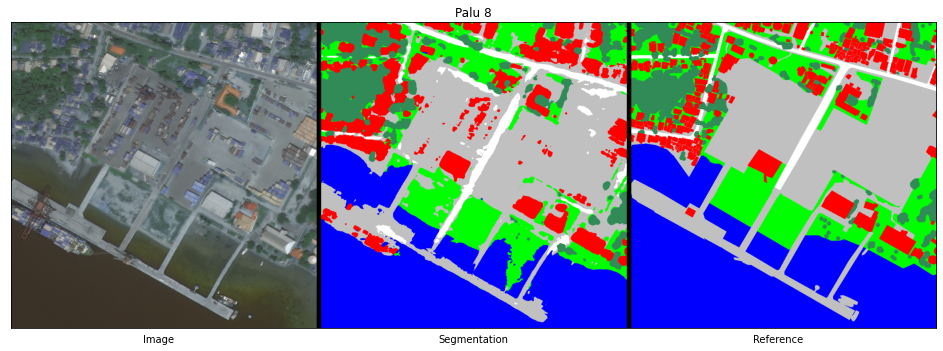

In [10]:
# plot and save image
evaluator.show_predicted_image(result, only_pred=False, save_img=False, save_dir=None)